<a href="https://colab.research.google.com/github/Harshitha-Arugonda/ProdigyInfoTech/blob/main/Linear_regression_model_to_predict_the_prices_of_houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/Housing.csv')
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['mainroad'] = label_encoder.fit_transform(dataset['mainroad'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['guestroom'] = label_encoder.fit_transform(dataset['guestroom'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['basement'] = label_encoder.fit_transform(dataset['basement'])

In [ ]:
label_encoder = LabelEncoder()
dataset['airconditioning'] = label_encoder.fit_transform(dataset['airconditioning'])

In [ ]:
label_encoder = LabelEncoder()
dataset['prefarea'] = label_encoder.fit_transform(dataset['prefarea'])

In [ ]:
label_encoder = LabelEncoder()
dataset['furnishingstatus'] = label_encoder.fit_transform(dataset['furnishingstatus'])


In [ ]:
label_encoder = LabelEncoder()
dataset['hotwaterheating'] = label_encoder.fit_transform(dataset['hotwaterheating'])


In [ ]:
# Check for null values in the entire dataset
print(dataset.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
dataset.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
dataset.shape

(545, 13)

In [ ]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
dataset.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
x=dataset[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y=dataset['price']


In [ ]:
x

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [ ]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 545 entries, 0 to 544
Series name: price
Non-Null Count  Dtype
--------------  -----
545 non-null    int64
dtypes: int64(1)
memory usage: 4.4 KB


In [ ]:
# Split the dataset into training and testing sets
Xtrain,Xtest,ytrain,ytest= train_test_split( x,y, test_size=0.40)

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 92 to 65
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             327 non-null    int64
 1   area              327 non-null    int64
 2   bedrooms          327 non-null    int64
 3   bathrooms         327 non-null    int64
 4   stories           327 non-null    int64
 5   mainroad          327 non-null    int64
 6   guestroom         327 non-null    int64
 7   basement          327 non-null    int64
 8   hotwaterheating   327 non-null    int64
 9   airconditioning   327 non-null    int64
 10  parking           327 non-null    int64
 11  prefarea          327 non-null    int64
 12  furnishingstatus  327 non-null    int64
dtypes: int64(13)
memory usage: 35.8 KB


In [ ]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 71 to 191
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             218 non-null    int64
 1   area              218 non-null    int64
 2   bedrooms          218 non-null    int64
 3   bathrooms         218 non-null    int64
 4   stories           218 non-null    int64
 5   mainroad          218 non-null    int64
 6   guestroom         218 non-null    int64
 7   basement          218 non-null    int64
 8   hotwaterheating   218 non-null    int64
 9   airconditioning   218 non-null    int64
 10  parking           218 non-null    int64
 11  prefarea          218 non-null    int64
 12  furnishingstatus  218 non-null    int64
dtypes: int64(13)
memory usage: 23.8 KB


In [ ]:
ytrain.info()

<class 'pandas.core.series.Series'>
Int64Index: 327 entries, 92 to 65
Series name: price
Non-Null Count  Dtype
--------------  -----
327 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [ ]:
ytest.info()

<class 'pandas.core.series.Series'>
Int64Index: 218 entries, 71 to 191
Series name: price
Non-Null Count  Dtype
--------------  -----
218 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB


In [ ]:

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(Xtrain, ytrain)


LinearRegression()

In [ ]:
# Make predictions on the test set
ypred = model.predict(Xtest)

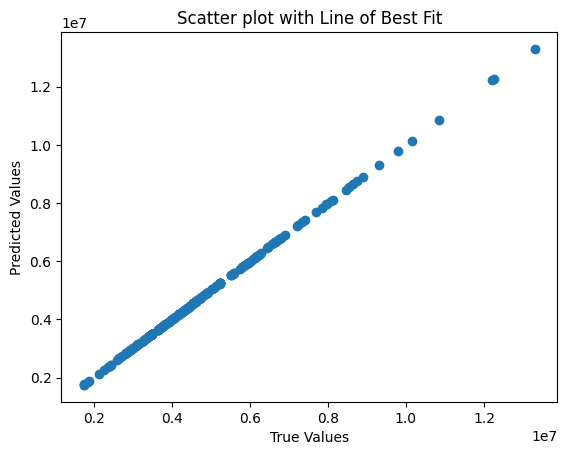

In [ ]:
# Assuming ytest and ypred are your data points
plt.scatter(ytest, ypred)

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter plot with Line of Best Fit")
plt.show()


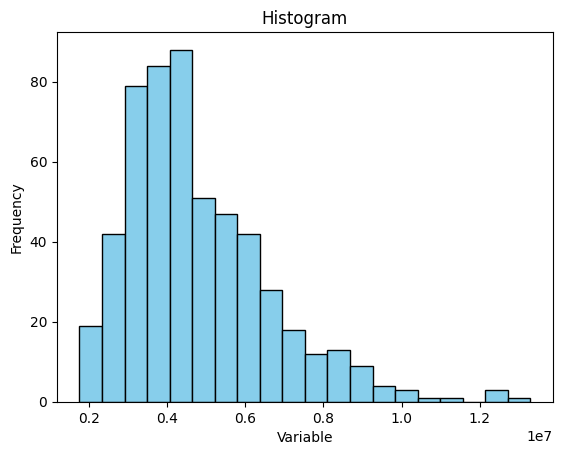

In [ ]:
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


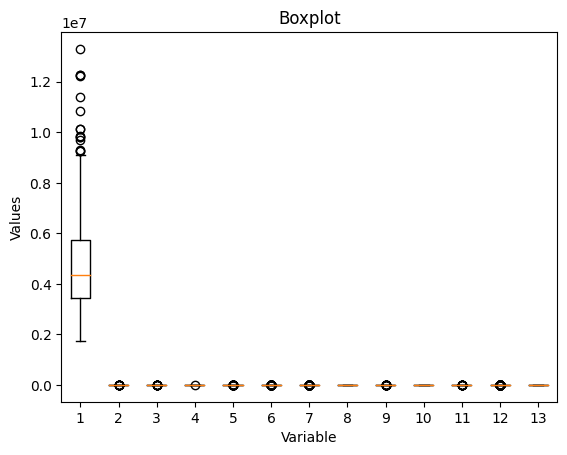

In [ ]:
plt.boxplot(dataset)
plt.xlabel('Variable')
plt.ylabel('Values')
plt.title('Boxplot')
plt.show()


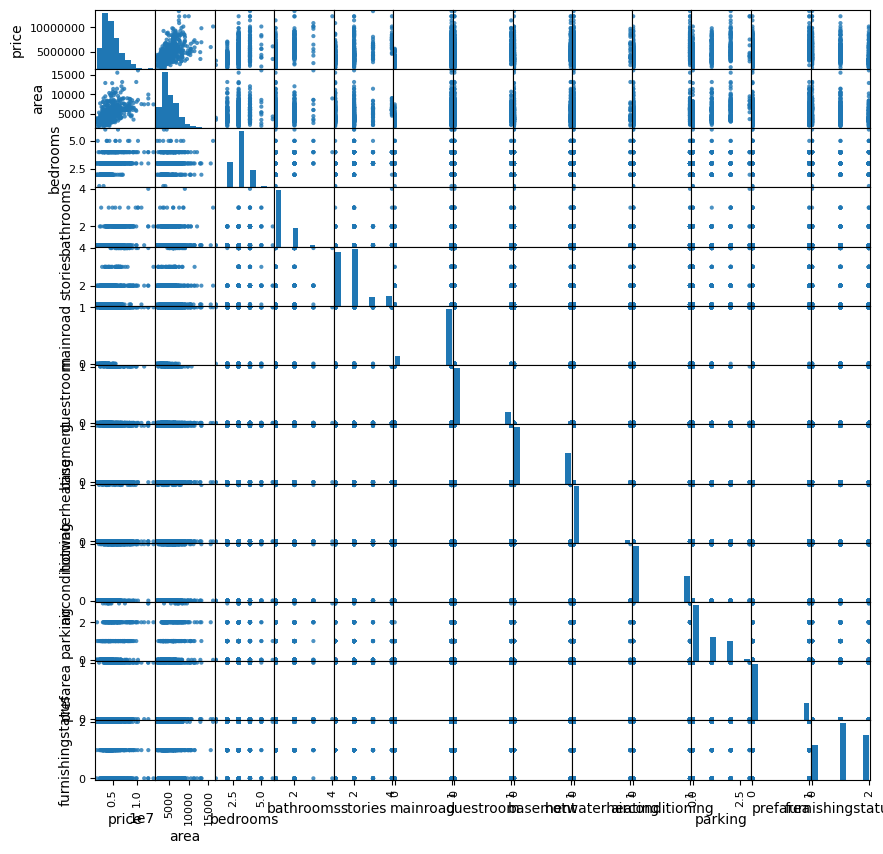

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(dataset, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()

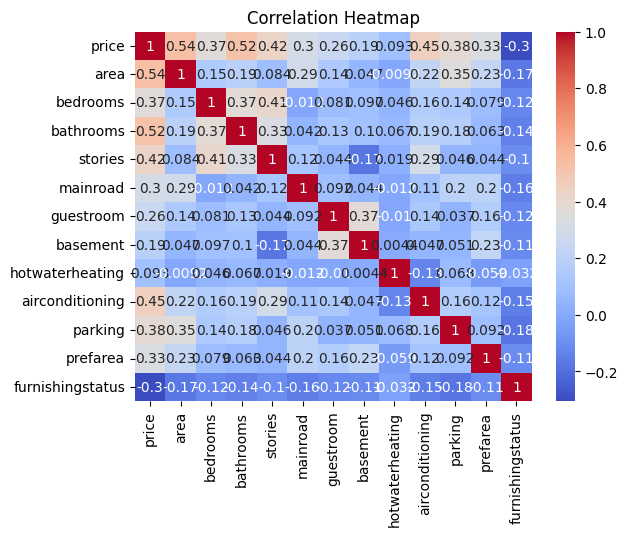

In [ ]:
import seaborn as sns

correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
